In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_API_TOKEN'] = "KGAT_6907a1bb5a9d428ba02bcd0e92be3ce2"

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
%%bash
cat > ~/.kaggle/kaggle.json << EOF
{
  "username": "token",
  "key": "KGAT_6907a1bb5a9d428ba02bcd0e92be3ce2"
}
EOF

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 99% 423M/429M [00:03<00:00, 113MB/s] 
100% 429M/429M [00:03<00:00, 119MB/s]


In [ ]:
!unzip ravdess-emotional-speech-audio.zip

Archive:  ravdess-emotional-speech-audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Actor_01/03

In [ ]:
import os
print(os.listdir())

['.config', 'Actor_08', 'Actor_03', 'Actor_11', 'Actor_06', 'Actor_04', 'Actor_09', 'Actor_13', 'Actor_19', 'Actor_22', 'Actor_14', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_20', 'audio_speech_actors_01-24', 'ravdess-emotional-speech-audio.zip', 'Actor_10', 'Actor_21', 'Actor_02', 'Actor_18', 'Actor_01', 'Actor_12', 'Actor_24', 'Actor_15', 'Actor_07', 'Actor_23', 'sample_data']


File: 03-01-06-02-01-01-01.wav
Waveform shape: (240240,)
Sample rate: 48000
Duration (seconds): 5.005


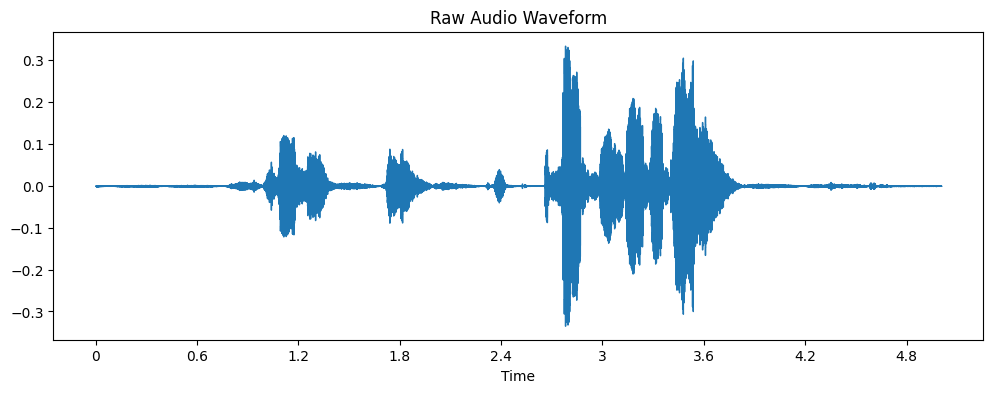

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to dataset (adjust if needed)
base_path = "/content"

# Pick one actor folder
actor_folder = os.path.join(base_path, "Actor_01")

# Pick one audio file
audio_file = os.listdir(actor_folder)[15]
audio_path = os.path.join(actor_folder, audio_file)

# Load audio
waveform, sample_rate = librosa.load(audio_path, sr=None)

print("File:", audio_file)
print("Waveform shape:", waveform.shape)
print("Sample rate:", sample_rate)

# Duration
duration = len(waveform) / sample_rate
print("Duration (seconds):", duration)

# Plot waveform
plt.figure(figsize=(12,4))
librosa.display.waveshow(waveform, sr=sample_rate)
plt.title("Raw Audio Waveform")
plt.show()

Original length (seconds): 3.8705208333333334
Trimmed length (seconds): 1.6746666666666667


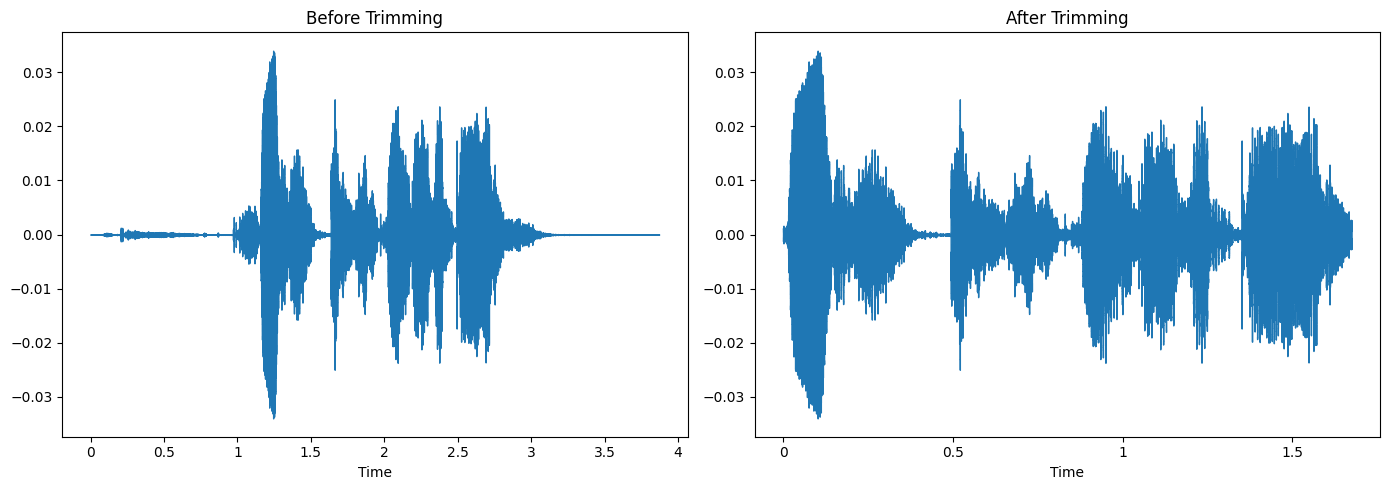

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Pick another audio file
actor_folder = "/content/Actor_01"
audio_file = os.listdir(actor_folder)[3]
audio_path = os.path.join(actor_folder, audio_file)

# Load audio
waveform, sr = librosa.load(audio_path, sr=None)

# Trim silence
trimmed_waveform, _ = librosa.effects.trim(waveform, top_db=20)

print("Original length (seconds):", len(waveform)/sr)
print("Trimmed length (seconds):", len(trimmed_waveform)/sr)

# Plot comparison
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
librosa.display.waveshow(waveform, sr=sr)
plt.title("Before Trimming")

plt.subplot(1,2,2)
librosa.display.waveshow(trimmed_waveform, sr=sr)
plt.title("After Trimming")

plt.tight_layout()
plt.show()

Mel spectrogram shape: (128, 156)


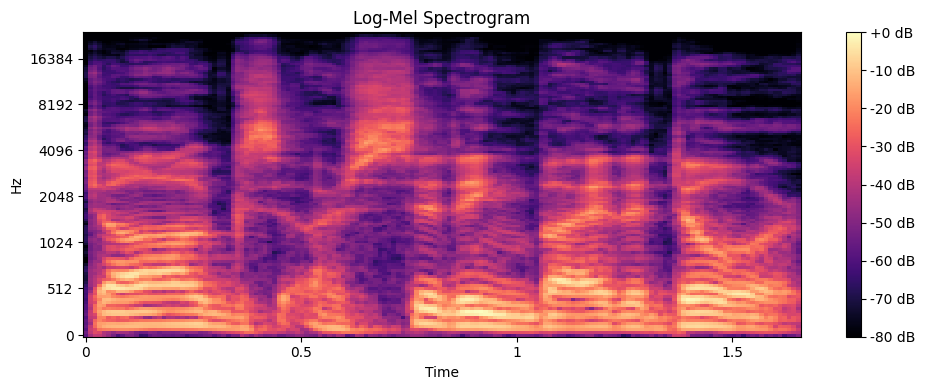

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np

# Load trimmed audio again (or re-trim)
actor_folder = "/content/Actor_01"
audio_file = os.listdir(actor_folder)[5]
audio_path = os.path.join(actor_folder, audio_file)

waveform, sr = librosa.load(audio_path, sr=None)
trimmed_waveform, _ = librosa.effects.trim(waveform, top_db=20)

# Create Mel spectrogram
mel_spec = librosa.feature.melspectrogram(
    y=trimmed_waveform,
    sr=sr,
    n_mels=128
)

# Convert to log scale
log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

print("Mel spectrogram shape:", log_mel_spec.shape)

# Plot it
plt.figure(figsize=(10,4))
librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Log-Mel Spectrogram")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

TARGET_WIDTH = 128

def pad_or_crop(spec, target_width=128):
    current_width = spec.shape[1]

    if current_width < target_width:
        # Pad with zeros
        pad_width = target_width - current_width
        spec = np.pad(spec, ((0,0), (0, pad_width)), mode='constant')

    else:
        # Crop center
        start = (current_width - target_width) // 2
        spec = spec[:, start:start + target_width]

    return spec

In [ ]:
fixed_spec = pad_or_crop(log_mel_spec, TARGET_WIDTH)

print("Original shape:", log_mel_spec.shape)
print("Fixed shape:", fixed_spec.shape)

Original shape: (128, 156)
Fixed shape: (128, 128)


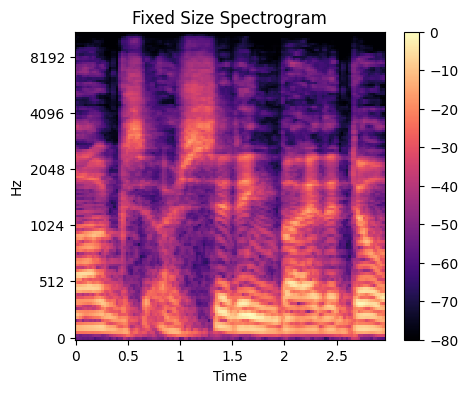

In [ ]:
plt.figure(figsize=(5,4))
librosa.display.specshow(fixed_spec, x_axis='time', y_axis='mel')
plt.title("Fixed Size Spectrogram")
plt.colorbar()
plt.show()

In [ ]:
import numpy as np
import librosa

# 1. Add noise
def add_noise(audio, noise_factor=0.005):
    noise = np.random.randn(len(audio))
    return audio + noise_factor * noise


# 2. Pitch shift
def pitch_shift(audio, sr, steps=2):
    return librosa.effects.pitch_shift(audio, sr=sr, n_steps=steps)


# 3. Time stretch
def time_stretch(audio, rate=1.1):
    return librosa.effects.time_stretch(audio, rate=rate)

In [ ]:
aug_noise = add_noise(trimmed_waveform)
aug_pitch = pitch_shift(trimmed_waveform, sr)
aug_stretch = time_stretch(trimmed_waveform, 1.1)

print(len(trimmed_waveform), len(aug_stretch))

79360 72145


In [ ]:
import IPython.display as ipd

ipd.Audio(trimmed_waveform, rate=sr)
ipd.Audio(aug_noise, rate=sr)
ipd.Audio(aug_pitch, rate=sr)

In [ ]:
emotion_map = {
    "01": 0,  # Neutral
    "02": 1,  # Calm
    "03": 2,  # Happy
    "04": 3,  # Sad
    "05": 4,  # Angry
    "06": 5,  # Fearful
    "07": 6,  # Disgust
    "08": 7   # Surprised
}

In [ ]:
import os
import numpy as np
import librosa

X = []
y = []

BASE_PATH = "/content"   # where Actor folders are
TARGET_WIDTH = 128

def process_audio(file_path):
    waveform, sr = librosa.load(file_path, sr=None)
    trimmed, _ = librosa.effects.trim(waveform, top_db=20)

    mel = librosa.feature.melspectrogram(
        y=trimmed,
        sr=sr,
        n_mels=128
    )

    log_mel = librosa.power_to_db(mel, ref=np.max)

    fixed = pad_or_crop(log_mel, TARGET_WIDTH)

    return fixed


for actor_folder in os.listdir(BASE_PATH):
    if not actor_folder.startswith("Actor"):
        continue

    folder_path = os.path.join(BASE_PATH, actor_folder)

    for file in os.listdir(folder_path):
        if not file.endswith(".wav"):
            continue

        # Extract emotion code
        emotion_code = file.split("-")[2]
        label = emotion_map[emotion_code]

        file_path = os.path.join(folder_path, file)

        spec = process_audio(file_path)

        X.append(spec)
        y.append(label)


X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1440, 128, 128)
y shape: (1440,)


In [ ]:
X = X[..., np.newaxis]

print("New X shape:", X.shape)

New X shape: (1440, 128, 128, 1)


In [ ]:
from sklearn.model_selection import train_test_split

# First split train vs temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Split temp into val and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)

Train: (1152, 128, 128, 1)
Val: (144, 128, 128, 1)
Test: (144, 128, 128, 1)


In [ ]:
mean = np.mean(X_train)
std = np.std(X_train)

X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_ser_cnn(input_shape=(128,128,1), num_classes=8):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(32, (3,3), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2,2)))

    # Block 2
    model.add(layers.Conv2D(64, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2,2)))

    # Block 3
    model.add(layers.Conv2D(128, (3,3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2,2)))

    # Global pooling instead of flatten (better generalization)
    model.add(layers.GlobalAveragePooling2D())

    # Dense classifier
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.4))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


model = build_ser_cnn()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,112 (434.03 KB)

 Trainable params: 110,664 (432.28 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=60,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.2196 - loss: 2.0843 - val_accuracy: 0.2222 - val_loss: 2.0346
Epoch 2/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2797 - loss: 1.8775 - val_accuracy: 0.1250 - val_loss: 2.2940
Epoch 3/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3246 - loss: 1.7308 - val_accuracy: 0.1319 - val_loss: 2.8588
Epoch 4/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3635 - loss: 1.6746 - val_accuracy: 0.1319 - val_loss: 3.8124
Epoch 5/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3544 - loss: 1.6524 - val_accuracy: 0.1319 - val_loss: 4.0904
Epoch 6/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3862 - loss: 1.6048 - val_accuracy: 0.1319 - val_loss: 5.1736
Epoch 7/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4274 - loss: 1.5046 - val_accuracy: 0.1319 - val_loss: 5.2460
Epoch 8/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4358 - loss: 1.4701 - val_accuracy: 0.1458 - 

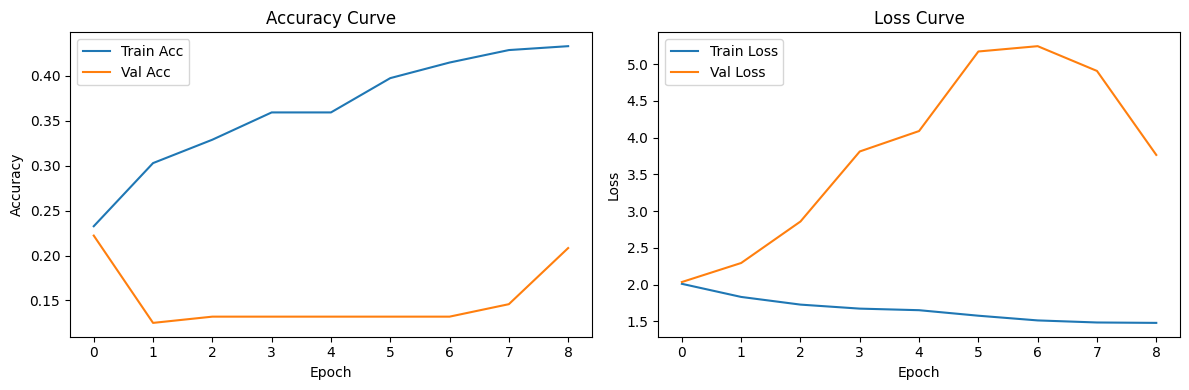

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.tight_layout()
plt.show()

In [ ]:
model.save("ser_cnn_best.keras")

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:", test_acc)

Test Accuracy: 0.1944444477558136


In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step


In [ ]:
from sklearn.metrics import f1_score

macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro F1 Score:", macro_f1)

Macro F1 Score: 0.11951413903437892


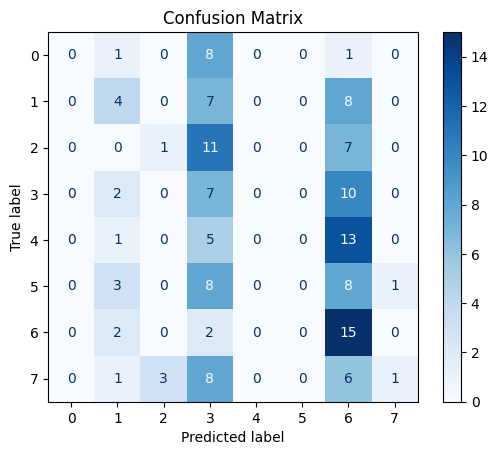

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
X = []
y = []
files = []

BASE_PATH = "/content"
TARGET_WIDTH = 128

for actor_folder in os.listdir(BASE_PATH):
    if not actor_folder.startswith("Actor"):
        continue

    folder_path = os.path.join(BASE_PATH, actor_folder)

    for file in os.listdir(folder_path):
        if not file.endswith(".wav"):
            continue

        emotion_code = file.split("-")[2]
        label = emotion_map[emotion_code]

        file_path = os.path.join(folder_path, file)

        spec = process_audio(file_path)

        X.append(spec)
        y.append(label)
        files.append(file)


X = np.array(X)
y = np.array(y)
files = np.array(files)

print(X.shape, y.shape, files.shape)

(1440, 128, 128) (1440,) (1440,)


In [ ]:
X = X[..., np.newaxis]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp, files_train, files_temp = train_test_split(
    X, y, files, test_size=0.2, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test, files_val, files_test = train_test_split(
    X_temp, y_temp, files_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)

Train: (1152, 128, 128, 1)
Val: (144, 128, 128, 1)
Test: (144, 128, 128, 1)


In [ ]:
mean = np.mean(X_train)
std = np.std(X_train)

X_train = (X_train - mean) / std
X_val = (X_val - mean) / std
X_test = (X_test - mean) / std

In [ ]:
male_idx = []
female_idx = []

for i, file in enumerate(files_test):
    actor_id = int(file.split("-")[-1].split(".")[0])

    if actor_id % 2 == 0:
        female_idx.append(i)
    else:
        male_idx.append(i)


male_acc = (y_pred[male_idx] == y_test[male_idx]).mean()
female_acc = (y_pred[female_idx] == y_test[female_idx]).mean()

print("Male accuracy:", male_acc)
print("Female accuracy:", female_acc)

Male accuracy: 0.20689655172413793
Female accuracy: 0.18604651162790697
